In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import google_auth_oauthlib
import json

import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
from pathlib import Path
api_key = Path('credentials.txt').read_text()
api_key = api_key.replace('\n', '')

In [4]:
channel_ids = ['UC7cBi_PeNQBFzdEh8aWsyAA', 
              # more channel here
              ]

In [5]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
        api_service_name, api_version, developerKey = api_key)

request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= channel_ids
    )
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': '0k3nGMt83HUkCQmIPSoBCnTDEzM', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'SeJ5vdZhC0vyUxhQyTFqs4k34wk', 'id': 'UC7cBi_PeNQBFzdEh8aWsyAA', 'snippet': {'title': 'Bracia Rodzeń', 'description': 'Od tego zacznij. Nasza książka ✅https://braciarodzen.pl/ksiazka-metoda-odchudzania-braci-rodzen/\nLekarze promujący #zdroweNIEjedzenie keto LChF IF głodówki ➡️Pora zdrowo schudnąć, wycofać insulinooporność i cukrzycę typu 2.  Otyłość to nie sprawa kalorii tylko hormonów 👉', 'customUrl': '@braciarodzen', 'publishedAt': '2015-05-01T19:03:07Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/1ZpTlmpM67tcbWeOJsdS0NjyJJSe7Ddn0AEDX5yflWSw-PUZr0ZGp6LvPXFD3jSBUqRAQhO9vw=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/1ZpTlmpM67tcbWeOJsdS0NjyJJSe7Ddn0AEDX5yflWSw-PUZr0ZGp6LvPXFD3jSBUqRAQhO9vw=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 2

In [6]:
print(json.dumps(response, indent=2, sort_keys=False))

{
  "kind": "youtube#channelListResponse",
  "etag": "0k3nGMt83HUkCQmIPSoBCnTDEzM",
  "pageInfo": {
    "totalResults": 1,
    "resultsPerPage": 5
  },
  "items": [
    {
      "kind": "youtube#channel",
      "etag": "SeJ5vdZhC0vyUxhQyTFqs4k34wk",
      "id": "UC7cBi_PeNQBFzdEh8aWsyAA",
      "snippet": {
        "title": "Bracia Rodze\u0144",
        "description": "Od tego zacznij. Nasza ksi\u0105\u017cka \u2705https://braciarodzen.pl/ksiazka-metoda-odchudzania-braci-rodzen/\nLekarze promuj\u0105cy #zdroweNIEjedzenie keto LChF IF g\u0142od\u00f3wki \u27a1\ufe0fPora zdrowo schudn\u0105\u0107, wycofa\u0107 insulinooporno\u015b\u0107 i cukrzyc\u0119 typu 2.  Oty\u0142o\u015b\u0107 to nie sprawa kalorii tylko hormon\u00f3w \ud83d\udc49",
        "customUrl": "@braciarodzen",
        "publishedAt": "2015-05-01T19:03:07Z",
        "thumbnails": {
          "default": {
            "url": "https://yt3.ggpht.com/1ZpTlmpM67tcbWeOJsdS0NjyJJSe7Ddn0AEDX5yflWSw-PUZr0ZGp6LvPXFD3jSBUqRAQhO9vw=s88-

Explore structure of JSON <br>
The ETag (or entity tag) HTTP response header is an identifier for a specific version of a resource. It lets caches be more efficient and save bandwidth, as a web server does not need to resend a full response if the content was not changed

In [7]:
#To get the desired value, we simply put those accesses one after another
#item is a list and on list you can use slices
response['items'][0]['snippet']['title']

'Bracia Rodzeń'

In [8]:
response['items'][0]['statistics']

{'viewCount': '43070652',
 'subscriberCount': '304000',
 'hiddenSubscriberCount': False,
 'videoCount': '1086'}

Define function witch get_channel_stats 

In [9]:
api_service_name = "youtube"
api_version = "v3"


youtube = build(
        api_service_name, api_version, developerKey = api_key)

In [10]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= channel_ids
    )
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribes' : item['statistics']['subscriberCount'],
               'views': item['statistics']['viewCount'],
               'totalViews' : item['statistics']["videoCount"],
               'playlistId' : item['contentDetails']['relatedPlaylists']['uploads']
               }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

In [11]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [12]:
channel_stats

,channelName,subscribes,views,totalViews,playlistId
0,Bracia Rodzeń,304000,43070652,1086,UU7cBi_PeNQBFzdEh8aWsyAA


In [13]:
#Get the all videos from the channel
request = youtube.playlistItems().list(
    part="snippet,contentDetails",
    playlistId="UU7cBi_PeNQBFzdEh8aWsyAA"
)
response = request.execute()

print(json.dumps(response, indent=2, sort_keys=False))

{
  "kind": "youtube#playlistItemListResponse",
  "etag": "ghoZg1Sw1xYeYaXdKMV_WzgwksU",
  "nextPageToken": "EAAaBlBUOkNBVQ",
  "items": [
    {
      "kind": "youtube#playlistItem",
      "etag": "Xf6sv7MVQN6JXQ8eE0NaFCdysl8",
      "id": "VVU3Y0JpX1BlTlFCRnpkRWg4YVdzeUFBLlIzdkZyY05VZEo0",
      "snippet": {
        "publishedAt": "2023-01-24T18:13:18Z",
        "channelId": "UC7cBi_PeNQBFzdEh8aWsyAA",
        "title": "Insulina powoduje nadci\u015bnienie t\u0119tnicze #hearthstone #anabolicsteroids #sport",
        "description": "",
        "thumbnails": {
          "default": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/default.jpg",
            "width": 120,
            "height": 90
          },
          "medium": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/mqdefault.jpg",
            "width": 320,
            "height": 180
          },
          "high": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/hqdefault.jpg",
            "width": 480,
   

Get the list of all VIDEO ID 

In [14]:
#How get the video ID - first solution
response['items'][0]['snippet']['resourceId']['videoId']

'R3vFrcNUdJ4'

In [15]:
#alternatively
response['items'][0]["contentDetails"]['videoId']

'R3vFrcNUdJ4'

In [16]:
playlist_id = 'UU7cBi_PeNQBFzdEh8aWsyAA'

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part = "snippet,contentDetails",
        playlistId = playlist_id 
    )
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
          
    return video_ids

In [17]:
#We get only 5 video ID
#The default max value is 5 and the max value we can set is 50
video_ids = get_video_ids(youtube, playlist_id)

In [18]:
def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
          
    return video_ids

In [19]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['R3vFrcNUdJ4',
 '-A-n-PiPqvQ',
 'uTHzXbRw-SQ',
 '1lqTDmPGFFQ',
 '6j_XZ9Q4Uco',
 'kft-RIuQdDg',
 'N_TQNvQ1Hew',
 'D8SU42llIFw',
 'f7u2DGX3_zw',
 'UjnmkR_JWpE',
 'tqjppc7WxHg',
 'X6zzczkW8UI',
 'U39nDbyFFuk',
 '7aYAozO3NiU',
 '4KBWMkgj1Xs',
 'MvT71S9ok-A',
 'INowbSpk84M',
 'MBU_fIXjhp8',
 'UOVzBm27lOE',
 'fHTDXHmDItc',
 'SuBQyZPzbsI',
 'ciC4Nk6Vay4',
 'o4h7l2YioMk',
 'ZNdRFkaUedk',
 'UM1d6t8UefI',
 'O7X0-AKMWYY',
 '5BhR9SbS22c',
 'fRDSOAisqoU',
 '5zXc-05eWrM',
 'ILAnKIwJpg0',
 '_EoNJDvhGjY',
 '2RR572SvUOw',
 '8n9ZtuSuZm4',
 'AfOEh6SSaAk',
 'LR5UEZLdVRo',
 'DRiifVbfX14',
 'eOGBJJtWGYU',
 '7nS7Ow0vMzc',
 'GvCAyIml6K0',
 'QzZBqkKfkfA',
 'Q6hDWg2ivSs',
 '7BmlQMtk9Y8',
 '8t5RcG7Mons',
 'Jsm0ho3LSzU',
 '73QX9CaJKEM',
 'OWJLmXvk-0E',
 'IBKoJwUy9kA',
 'KFFr9LP3wec',
 'qFl7ypZRx9I',
 'dePuLuC-OCo']

In [20]:
len(video_ids)

50

Getting > 50 Video_Id

In [21]:
playlist_id = "UU7cBi_PeNQBFzdEh8aWsyAA"

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get("nextPageToken")
    while next_page_token is not None:
        request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50,
        pageToken = next_page_token)
        
        response = request.execute()
    
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
            
        next_page_token = response.get("nextPageToken")
          
    return video_ids

In [61]:
video_ids = get_video_ids(youtube, playlist_id)

In [23]:
len(video_ids)

1087

Extract video information

In [24]:
request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=video_ids[0:5]
    )
response = request.execute()
print(json.dumps(response, indent=2, sort_keys=False))

{
  "kind": "youtube#videoListResponse",
  "etag": "8cSuUr-YOfGg1Xrf1VvTETPyFJE",
  "items": [
    {
      "kind": "youtube#video",
      "etag": "HpEPQ6B80hFKZiFipeXT0y12e0s",
      "id": "R3vFrcNUdJ4",
      "snippet": {
        "publishedAt": "2023-01-24T18:13:18Z",
        "channelId": "UC7cBi_PeNQBFzdEh8aWsyAA",
        "title": "Insulina powoduje nadci\u015bnienie t\u0119tnicze #hearthstone #anabolicsteroids #sport",
        "description": "",
        "thumbnails": {
          "default": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/default.jpg",
            "width": 120,
            "height": 90
          },
          "medium": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/mqdefault.jpg",
            "width": 320,
            "height": 180
          },
          "high": {
            "url": "https://i.ytimg.com/vi/R3vFrcNUdJ4/hqdefault.jpg",
            "width": 480,
            "height": 360
          },
          "standard": {
            "url": "https://

In [25]:
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [27]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,R3vFrcNUdJ4,Bracia Rodzeń,Insulina powoduje nadciśnienie tętnicze #heart...,,None,2023-01-24T18:13:18Z,4024,330,None,5,PT53S,hd,false
1,-A-n-PiPqvQ,Bracia Rodzeń,To nie są dobre ZALECENIA żeby schudnąć i żyć ...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-23T19:30:10Z,33631,2711,None,192,PT25M7S,hd,false
2,uTHzXbRw-SQ,Bracia Rodzeń,ANABOLIKI do czego służy i co powodują?,,None,2023-01-23T18:37:47Z,6907,366,None,2,PT1M,hd,false
3,1lqTDmPGFFQ,Bracia Rodzeń,Weź zastrzyk i jedz co chcesz!! Otyłość to cho...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-22T22:41:07Z,1,42,None,7,PT15M23S,hd,false
4,6j_XZ9Q4Uco,Bracia Rodzeń,Jak objawia się układ współczulny ? #zdrowenie...,,None,2023-01-22T18:15:23Z,5638,399,None,5,PT50S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Yglkz0vBYVo,Bracia Rodzeń,Witamina D - witamina szczęścia :),"Natury ludzkiej nie zmienimy, a przynajmniej o...",None,2020-04-29T16:04:39Z,50565,4523,None,215,PT39M14S,sd,false
1083,UVtzgdUVvWU,Bracia Rodzeń,"Bostonka-choroba dłoni, stóp i jamy ustnej. Ws...",Pęcherzyki w jamie ustnej na dłoniach i stopac...,None,2020-04-23T08:12:16Z,3470,251,None,5,PT5M21S,hd,false
1084,qKTFdavfF-A,Bracia Rodzeń,Ospa wietrzna. Dowiesz się jak rozpoznać ospę ...,Ospa wietrzna to jedna z najbardziej zakaźnych...,None,2020-04-23T07:00:20Z,2407,170,None,8,PT6M11S,hd,false
1085,6xVVSwyZza0,Bracia Rodzeń,Pierwszy taki e-book dla mam przedszkolaków - ...,"Jesteśmy pod wrażeniem wszystkich Super Mam, k...",None,2020-04-22T22:06:28Z,4155,298,None,5,PT2M17S,hd,false


In [28]:
len(video_df)

1087

## Data pre-processing

In [29]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [30]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        1087 non-null   object
 1   channelTitle    1087 non-null   object
 2   title           1087 non-null   object
 3   description     1087 non-null   object
 4   tags            449 non-null    object
 5   publishedAt     1087 non-null   object
 6   viewCount       1087 non-null   object
 7   likeCount       1087 non-null   object
 8   favouriteCount  0 non-null      object
 9   commentCount    1087 non-null   object
 10  duration        1087 non-null   object
 11  definition      1087 non-null   object
 12  caption         1087 non-null   object
dtypes: object(13)
memory usage: 110.5+ KB


In [31]:
len(video_df)

1087

In [32]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount','commentCount']

In [33]:
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric,  axis = 1)

In [34]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        1087 non-null   object 
 1   channelTitle    1087 non-null   object 
 2   title           1087 non-null   object 
 3   description     1087 non-null   object 
 4   tags            449 non-null    object 
 5   publishedAt     1087 non-null   object 
 6   viewCount       1087 non-null   float64
 7   likeCount       1087 non-null   float64
 8   favouriteCount  0 non-null      float64
 9   commentCount    1087 non-null   float64
 10  duration        1087 non-null   object 
 11  definition      1087 non-null   object 
 12  caption         1087 non-null   object 
dtypes: float64(4), object(9)
memory usage: 110.5+ KB


In [35]:
#Create new column - publish day in the week 

In [36]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        1087 non-null   object 
 1   channelTitle    1087 non-null   object 
 2   title           1087 non-null   object 
 3   description     1087 non-null   object 
 4   tags            449 non-null    object 
 5   publishedAt     1087 non-null   object 
 6   viewCount       1087 non-null   float64
 7   likeCount       1087 non-null   float64
 8   favouriteCount  0 non-null      float64
 9   commentCount    1087 non-null   float64
 10  duration        1087 non-null   object 
 11  definition      1087 non-null   object 
 12  caption         1087 non-null   object 
dtypes: float64(4), object(9)
memory usage: 110.5+ KB


In [37]:
#Convert datetime64[ns, UTC] pandas column to datetime
video_df['publishedAt'] = pd.to_datetime(video_df.publishedAt).dt.tz_localize(None)

In [38]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   video_id        1087 non-null   object        
 1   channelTitle    1087 non-null   object        
 2   title           1087 non-null   object        
 3   description     1087 non-null   object        
 4   tags            449 non-null    object        
 5   publishedAt     1087 non-null   datetime64[ns]
 6   viewCount       1087 non-null   float64       
 7   likeCount       1087 non-null   float64       
 8   favouriteCount  0 non-null      float64       
 9   commentCount    1087 non-null   float64       
 10  duration        1087 non-null   object        
 11  definition      1087 non-null   object        
 12  caption         1087 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 110.5+ KB


In [39]:
video_df['day_week'] = video_df['publishedAt'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
video_df['day_week'] = video_df['day_week'].apply(lambda x: days[x])

In [40]:
#create new column year_month
video_df['publishedAt_year_month'] = video_df['publishedAt'].dt.strftime('%m-%Y')

In [41]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,day_week,publishedAt_year_month
0,R3vFrcNUdJ4,Bracia Rodzeń,Insulina powoduje nadciśnienie tętnicze #heart...,,None,2023-01-24 18:13:18,4024.0,330.0,NaN,5.0,PT53S,hd,false,Tues,01-2023
1,-A-n-PiPqvQ,Bracia Rodzeń,To nie są dobre ZALECENIA żeby schudnąć i żyć ...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-23 19:30:10,33631.0,2711.0,NaN,192.0,PT25M7S,hd,false,Mon,01-2023
2,uTHzXbRw-SQ,Bracia Rodzeń,ANABOLIKI do czego służy i co powodują?,,None,2023-01-23 18:37:47,6907.0,366.0,NaN,2.0,PT1M,hd,false,Mon,01-2023
3,1lqTDmPGFFQ,Bracia Rodzeń,Weź zastrzyk i jedz co chcesz!! Otyłość to cho...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-22 22:41:07,1.0,42.0,NaN,7.0,PT15M23S,hd,false,Sun,01-2023
4,6j_XZ9Q4Uco,Bracia Rodzeń,Jak objawia się układ współczulny ? #zdrowenie...,,None,2023-01-22 18:15:23,5638.0,399.0,NaN,5.0,PT50S,hd,false,Sun,01-2023


Convert Youtube Duration into seconds <br>
<br>
The property value is an ISO 8601 duration. <br>
For a video that is at least one minute long and less than one hour long, the duration is in the format PT#M#S
For example, a value of PT15M33S indicates that the video is 15 minutes and 33 seconds long <br>
he duration is in the format PT#H#M#S, in which the # preceding the letter H specifies the length of the video in hours and all of the other details are the same as described above

In [42]:
video_df['duration'].unique()

array(['PT53S', 'PT25M7S', 'PT1M', 'PT15M23S', 'PT50S', 'PT15M31S',
       'PT57S', 'PT13M38S', 'PT51S', 'PT14M22S', 'PT12M41S', 'PT42S',
       'PT41M2S', 'PT38S', 'PT47S', 'PT16M42S', 'PT41S', 'PT13M15S',
       'PT30S', 'PT32M24S', 'PT44S', 'PT52S', 'PT1M1S', 'PT13M47S',
       'PT26S', 'PT16S', 'PT11M44S', 'PT34S', 'PT45M25S', 'PT45S',
       'PT56S', 'PT22M29S', 'PT37S', 'PT7M52S', 'PT32S', 'PT39M59S',
       'PT21S', 'PT33S', 'PT49S', 'PT1H2M12S', 'PT37M37S', 'PT13M22S',
       'PT36S', 'PT1H14M18S', 'PT22S', 'PT32M7S', 'PT17M4S', 'PT15M57S',
       'PT25S', 'PT17S', 'PT12M22S', 'PT15M49S', 'PT40S', 'PT16M20S',
       'PT18M54S', 'PT23S', 'PT16M14S', 'PT40M41S', 'PT28M2S', 'PT16M57S',
       'PT25M20S', 'PT29S', 'PT14M12S', 'PT13M14S', 'PT11M38S',
       'PT23M30S', 'PT15M17S', 'PT15M19S', 'PT10M20S', 'PT36M24S',
       'PT46S', 'PT11M35S', 'PT26M36S', 'PT19M33S', 'PT1M55S', 'PT14M26S',
       'PT48S', 'PT12M45S', 'PT19M11S', 'PT9M56S', 'PT43S', 'PT9M22S',
       'PT14M5S', 'PT15

In [43]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs']  = video_df['durationSecs'].astype('timedelta64[s]')

In [44]:
#Add tag count 
#There are some empty cells
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

## Data exploration

In [45]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                1087 non-null   object        
 1   channelTitle            1087 non-null   object        
 2   title                   1087 non-null   object        
 3   description             1087 non-null   object        
 4   tags                    449 non-null    object        
 5   publishedAt             1087 non-null   datetime64[ns]
 6   viewCount               1087 non-null   float64       
 7   likeCount               1087 non-null   float64       
 8   favouriteCount          0 non-null      float64       
 9   commentCount            1087 non-null   float64       
 10  duration                1087 non-null   object        
 11  definition              1087 non-null   object        
 12  caption                 1087 non-null   object  

In [46]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,day_week,publishedAt_year_month,durationSecs,tagCount
0,R3vFrcNUdJ4,Bracia Rodzeń,Insulina powoduje nadciśnienie tętnicze #heart...,,None,2023-01-24 18:13:18,4024.0,330.0,NaN,5.0,PT53S,hd,false,Tues,01-2023,53.0,0
1,-A-n-PiPqvQ,Bracia Rodzeń,To nie są dobre ZALECENIA żeby schudnąć i żyć ...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-23 19:30:10,33631.0,2711.0,NaN,192.0,PT25M7S,hd,false,Mon,01-2023,1507.0,16
2,uTHzXbRw-SQ,Bracia Rodzeń,ANABOLIKI do czego służy i co powodują?,,None,2023-01-23 18:37:47,6907.0,366.0,NaN,2.0,PT1M,hd,false,Mon,01-2023,60.0,0
3,1lqTDmPGFFQ,Bracia Rodzeń,Weź zastrzyk i jedz co chcesz!! Otyłość to cho...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-22 22:41:07,1.0,42.0,NaN,7.0,PT15M23S,hd,false,Sun,01-2023,923.0,16
4,6j_XZ9Q4Uco,Bracia Rodzeń,Jak objawia się układ współczulny ? #zdrowenie...,,None,2023-01-22 18:15:23,5638.0,399.0,NaN,5.0,PT50S,hd,false,Sun,01-2023,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Yglkz0vBYVo,Bracia Rodzeń,Witamina D - witamina szczęścia :),"Natury ludzkiej nie zmienimy, a przynajmniej o...",None,2020-04-29 16:04:39,50565.0,4523.0,NaN,215.0,PT39M14S,sd,false,Weds,04-2020,2354.0,0
1083,UVtzgdUVvWU,Bracia Rodzeń,"Bostonka-choroba dłoni, stóp i jamy ustnej. Ws...",Pęcherzyki w jamie ustnej na dłoniach i stopac...,None,2020-04-23 08:12:16,3470.0,251.0,NaN,5.0,PT5M21S,hd,false,Thurs,04-2020,321.0,0
1084,qKTFdavfF-A,Bracia Rodzeń,Ospa wietrzna. Dowiesz się jak rozpoznać ospę ...,Ospa wietrzna to jedna z najbardziej zakaźnych...,None,2020-04-23 07:00:20,2407.0,170.0,NaN,8.0,PT6M11S,hd,false,Thurs,04-2020,371.0,0
1085,6xVVSwyZza0,Bracia Rodzeń,Pierwszy taki e-book dla mam przedszkolaków - ...,"Jesteśmy pod wrażeniem wszystkich Super Mam, k...",None,2020-04-22 22:06:28,4155.0,298.0,NaN,5.0,PT2M17S,hd,false,Weds,04-2020,137.0,0


In [47]:
# assigh a constant figure size a
FIG_SIZE = (8,6)

## Number of videos per day of the week

In [48]:
#Number of video per day of the week
video_per_day = video_df.groupby('day_week')['video_id'].count().reset_index(name = 'Number of video')

Text(0.5, 1.0, 'Number of videos per day of the week')

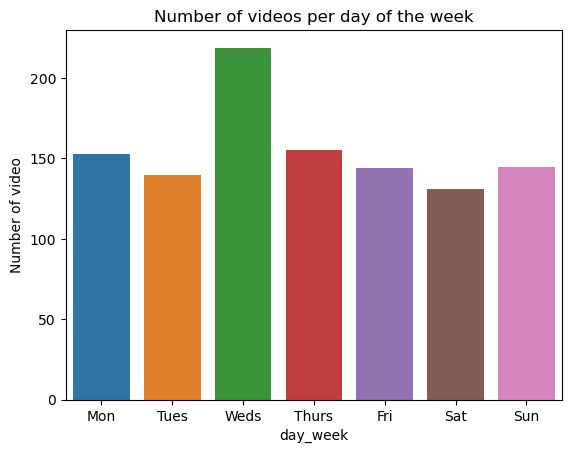

In [49]:
order = ['Mon','Tues','Weds','Thurs','Fri','Sat','Sun']
ax = sns.barplot(x = 'day_week', y = 'Number of video', data = video_per_day, order = order)

ax.set_title('Number of videos per day of the week')

## Number of videos over time

In [50]:
#Number of video per day
video_per_day = video_df.groupby('publishedAt')['video_id'].count().reset_index(name = 'Number of video')
video_per_day.index = video_per_day['publishedAt']
video_per_day.drop(columns=['publishedAt'], inplace=True)
video_per_day

,Number of video
publishedAt,
2020-04-22 15:56:45,1
2020-04-22 22:06:28,1
2020-04-23 07:00:20,1
2020-04-23 08:12:16,1
2020-04-29 16:04:39,1
...,...
2023-01-22 18:15:23,1
2023-01-22 22:41:07,1
2023-01-23 18:37:47,1


<AxesSubplot: title={'center': 'Number of videos over time'}, xlabel='publishedAt'>

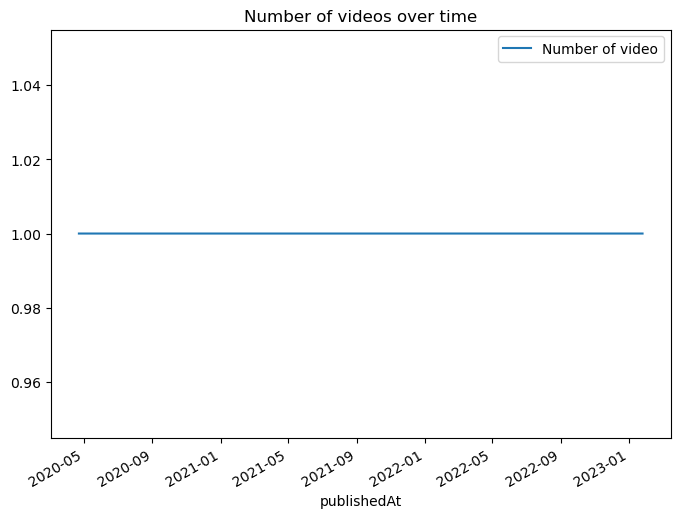

In [51]:
video_per_day.plot(figsize=FIG_SIZE, title = 'Number of videos over time')

This channel has never posted more than 1 video per day

## Number of videos per month in a given year

In [52]:
#Number of videos per M-Y
video_per_month_year = video_df.groupby('publishedAt_year_month')['video_id'].count().reset_index(name = 'Number of video')
video_per_month_year.index = video_per_month_year['publishedAt_year_month']
video_per_month_year.drop(columns=['publishedAt_year_month'], inplace=True)
video_per_month_year.head(5)

,Number of video
publishedAt_year_month,
01-2021,8
01-2022,41
01-2023,39
02-2021,18
02-2022,41


In [53]:
video_per_month_year.sort_values('Number of video', ascending = False).head(5)

,Number of video
publishedAt_year_month,
11-2022,78
10-2022,67
12-2022,62
09-2022,62
07-2022,60


<AxesSubplot: title={'center': 'Number of videos over time'}, xlabel='publishedAt_year_month'>

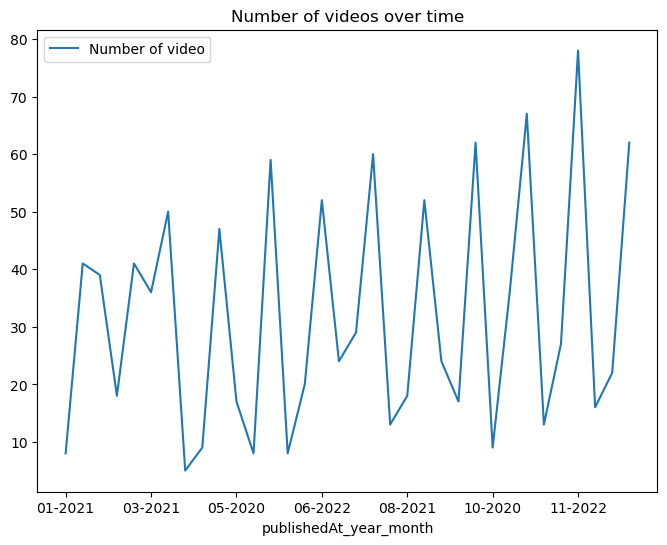

In [54]:
video_per_month_year.plot(figsize=FIG_SIZE, title = 'Number of videos over time')

The most video was published in November 2022

## Top most viewed videos

In [55]:
#Five top most viewed videos
most_viewed_videos = video_df.nlargest(5, 'viewCount')
most_viewed_videos

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,day_week,publishedAt_year_month,durationSecs,tagCount
902,kwA13OcYTbY,Bracia Rodzeń,Dna moczanowa - prawdziwe przyczyny i skuteczn...,Od tego zacznij 📖Rozpoczęliśmy przedsprzedaż n...,None,2021-03-25 16:00:15,642450.0,37809.0,NaN,1301.0,PT22M2S,hd,false,Thurs,03-2021,1322.0,0
1027,zUNzxz9EWwE,Bracia Rodzeń,Masz stłuszczenie wątroby? Nie możesz ominąć t...,Od tego zacznij 📖Rozpoczęliśmy przedsprzedaż n...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2020-08-10 18:00:09,603153.0,21619.0,NaN,968.0,PT24M29S,hd,false,Mon,08-2020,1469.0,14
1019,Rntjri4qQbc,Bracia Rodzeń,"Co jeść, żeby Twój organizm wszedł w KETOZĘ👍🙂",Od tego zacznij 📖Rozpoczęliśmy przedsprzedaż n...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2020-09-01 06:00:03,575945.0,24719.0,NaN,1818.0,PT21M26S,hd,false,Tues,09-2020,1286.0,16
868,R4RXJMydi14,Bracia Rodzeń,Otyłość brzuszna ! Tu nie chodzi o wygląd 😒 Zo...,Od tego zacznij 📖Rozpoczęliśmy przedsprzedaż n...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2021-06-19 18:00:12,562441.0,42493.0,NaN,1403.0,PT12M53S,hd,false,Sat,06-2021,773.0,16
919,ABu2DMALiXA,Bracia Rodzeń,Schudnąć zdrowo 30 kg? To możliwe tylko stosuj...,Od tego zacznij 📖Rozpoczęliśmy przedsprzedaż n...,"[insulinooporność, chudnięcie, zdrowie, Keto, ...",2021-03-08 14:09:25,505693.0,47968.0,NaN,932.0,PT19M6S,hd,false,Mon,03-2021,1146.0,6


## Least viewed videos

In [56]:
#Five least viewed videos
most_viewed_videos = video_df.nsmallest(5, 'viewCount')
most_viewed_videos

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,day_week,publishedAt_year_month,durationSecs,tagCount
655,7BBx3qAZBfw,Bracia Rodzeń,test,"Kupując produkty, które dla Ciebie tworzymy, w...",None,2022-02-07 21:18:22,0.0,23.0,NaN,0.0,P0D,sd,false,Mon,02-2022,0.0,0
3,1lqTDmPGFFQ,Bracia Rodzeń,Weź zastrzyk i jedz co chcesz!! Otyłość to cho...,📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-22 22:41:07,1.0,42.0,NaN,7.0,PT15M23S,hd,false,Sun,01-2023,923.0,16
7,D8SU42llIFw,Bracia Rodzeń,Jak zostać MISTRZEM świata w tym co dla Ciebie...,💡Weź udział w II edycji Czystej Konferencji\nh...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-21 16:53:13,3.0,8.0,NaN,0.0,PT13M38S,hd,false,Sat,01-2023,818.0,16
9,UjnmkR_JWpE,Bracia Rodzeń,"Reklamowali produkty PEŁNE cukru jako ""ZDROWE""...",📖 Od tego zacznij - KSIĄŻKA: Metoda Odchudzani...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2023-01-20 17:19:11,3.0,43.0,NaN,2.0,PT14M22S,hd,false,Fri,01-2023,862.0,16
40,Q6hDWg2ivSs,Bracia Rodzeń,"""Przestrzeganie tych zaleceń GWARANTUJE szybką...",💡Weź udział w II edycji Czystej Konferencji\nh...,"[zdrowie, insulinooporność, bracia, wiedza, le...",2022-12-31 14:39:39,3.0,15.0,NaN,0.0,PT7M52S,hd,false,Sat,12-2022,472.0,16


## Views vs. likes and comments

<AxesSubplot: xlabel='likeCount', ylabel='viewCount'>

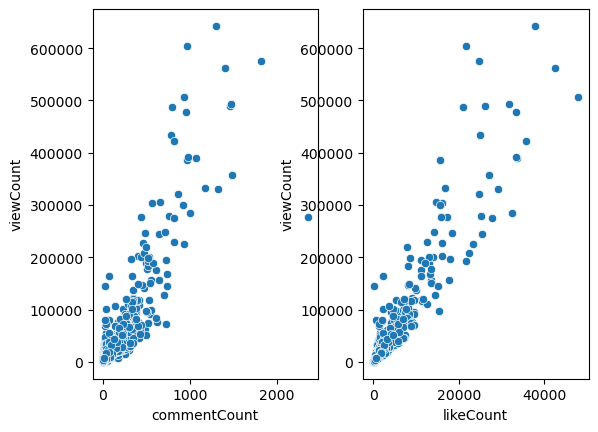

In [57]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

## Duration vs. views

<AxesSubplot: xlabel='durationSecs', ylabel='viewCount'>

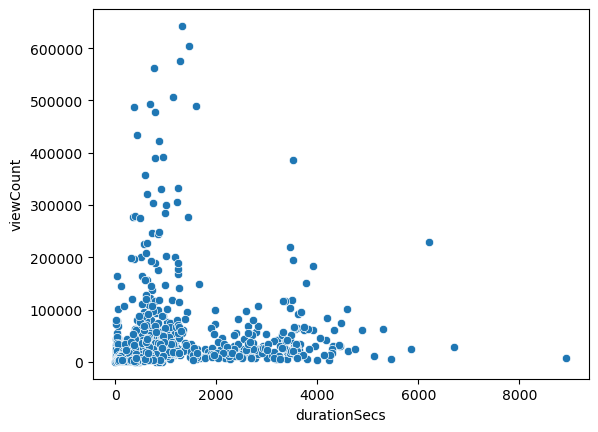

In [58]:
sns.scatterplot(data = video_df, x = 'durationSecs', y = 'viewCount')

## Views vs. tagCount

<AxesSubplot: xlabel='tagCount', ylabel='viewCount'>

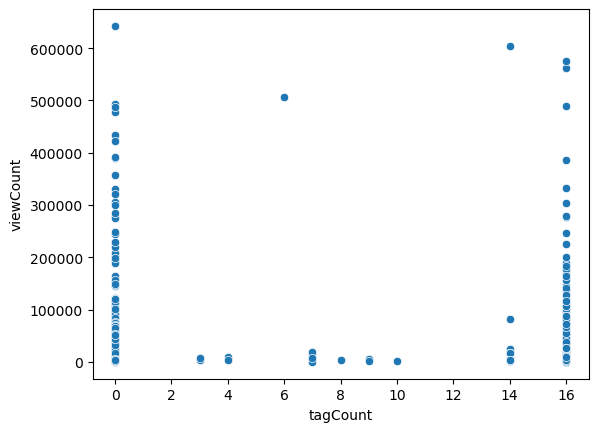

In [59]:
sns.scatterplot(data = video_df, x = 'tagCount', y = 'viewCount')

## Duration of video

<AxesSubplot: xlabel='durationSecs', ylabel='Count'>

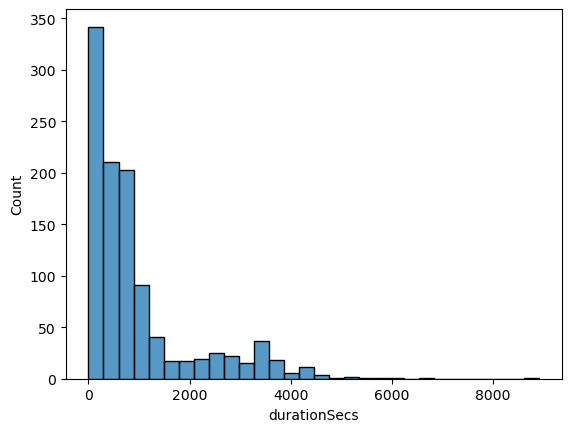

In [60]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)